### Data features: {-}

* age: The person’s age in years
* sex: The person’s sex (1 = male, 0 = female)
* cp: chest pain type
  * Value 0: asymptomatic
  * Value 1: atypical angina
  * Value 2: non-anginal pain
  * Value 3: typical angina
* trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)
* chol: The person’s cholesterol measurement in mg/dl (mg/dl: milligrams per decilitre)
* fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) (Fasting blood glucose: A test to determine how much glucose (sugar) is in a blood sample after an overnight without eating).
* restecg: resting electrocardiographic results
  * Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
  * Value 1: normal
  * Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* thalach: The person’s maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot)
* slope: the slope of the peak exercise ST segment
  * 0: downsloping
  * 1: flat
  * 2: upsloping
* ca: The number of major vessels (values in 0–3)
* thal: A blood disorder called thalassemia
  * Value 0: NULL (dropped from the dataset previously
  * Value 1: fixed defect (no blood flow in some part of the heart)
  * Value 2: normal blood flow
  * Value 3: reversible defect (a blood flow is observed but it is not normal)
  
### Data label: {-}

* target: Heart disease (1 = no, 0= yes)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Load the data
data = pd.read_csv('heart-disease.csv')

In [ ]:
# Display the data
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1
5,71,0,1,160,306,0,1,166,0,0.4,2,2,2,1
6,71,0,1,160,301,0,1,161,0,0.4,2,2,2,1
7,71,0,1,160,300,0,1,160,0,0.4,2,2,2,1
8,71,0,1,160,299,0,1,159,0,0.4,2,2,2,1
9,71,0,1,160,298,0,1,158,0,0.4,2,2,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB


In [ ]:
data.shape

(886, 14)

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,54.007901,0.683973,1.005643,132.117381,247.497743,0.168172,0.495485,149.492099,0.310384,1.083296,1.424379,0.714447,2.278781,0.564334
std,9.126292,0.465186,1.024542,16.807511,47.209995,0.374230,0.526669,23.921327,0.462912,1.147935,0.556861,1.028825,0.572576,0.496124
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,245.000000,0.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,206.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Exploratory Data Analysis

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

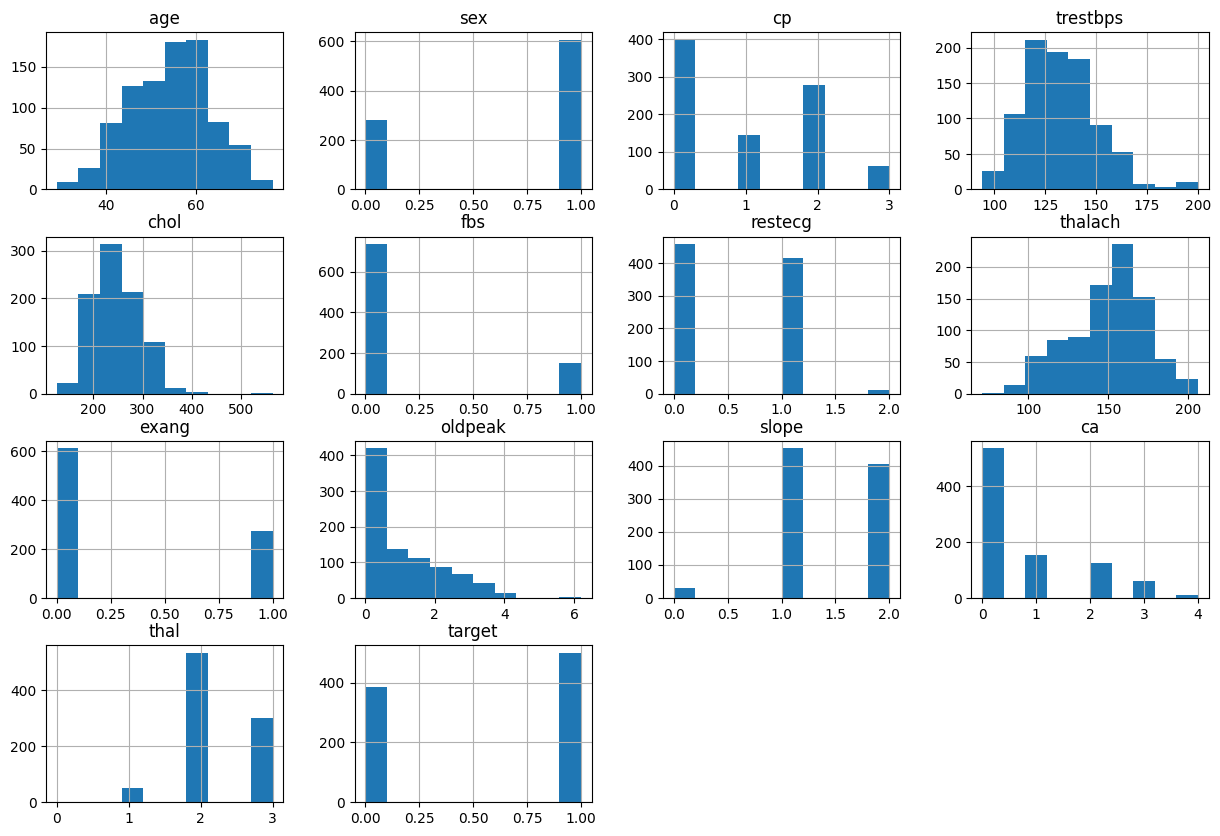

In [ ]:
data.hist(figsize=(15, 10))

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
columns_to_check = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# Function to detect outliers using IQR method
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)  # 1st quartile
    Q3 = data[col].quantile(0.75)  # 3rd quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return filtered_data

# Record new data without outliers for each specified column
new_data= data.copy()  # Create a copy of the original data

for col in columns_to_check:
    new_data = remove_outliers_iqr(new_data, col)

In [ ]:
data=new_data

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000
mean,53.878049,0.687573,1.011614,130.995354,245.954704,0.167247,0.500581,149.153310,0.310105,1.071777,1.427410,0.709640,2.264808,0.573751
std,9.183288,0.463752,1.028593,15.091965,44.866796,0.373414,0.525235,23.573531,0.462805,1.116923,0.550595,1.031712,0.570214,0.494818
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,86.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,244.000000,0.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,272.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,206.000000,1.000000,4.400000,2.000000,4.000000,3.000000,1.000000


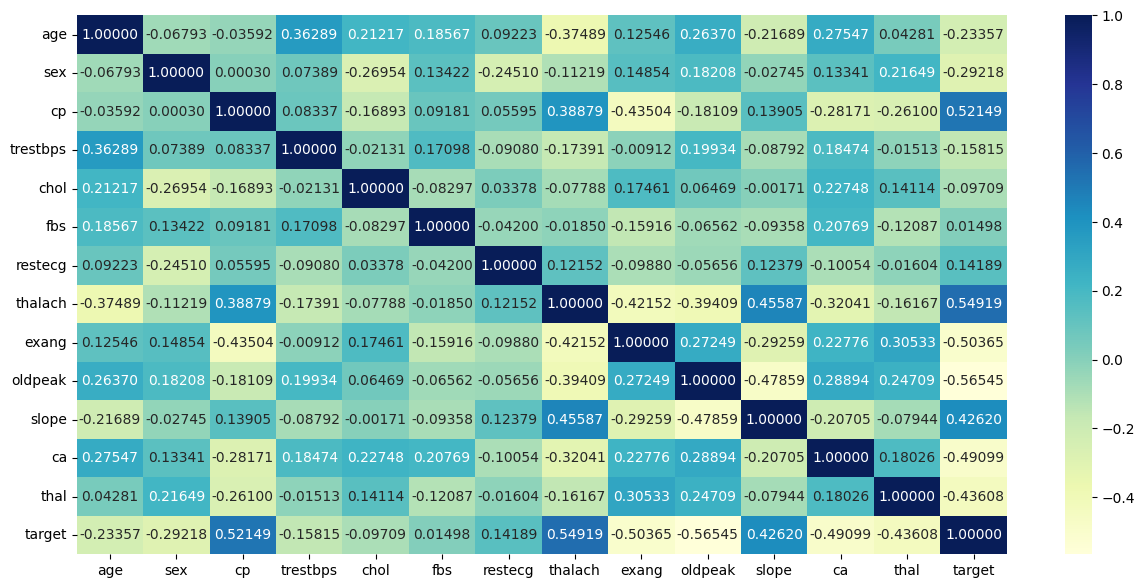

In [ ]:
# Plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', fmt='.5f')
plt.show()

# Model Training

In [ ]:
# Get the column names
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
# Pre-process data, determine feature x and label y
columns = data.columns.tolist()
columns.remove("target")

In [ ]:
# Pre-process data, determine feature x and label y
feature_data = data[columns]
target_data = data['target']

In [ ]:
target_data=target_data.to_numpy()
target_data=target_data.reshape(-1,1)

In [ ]:
# Split the dataset to training and testing, ratio 70:30.
from sklearn.model_selection import train_test_split
 # Train-test split with fixed random state
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.3, random_state=101)

print("X_train: " + str(X_train.shape))
print("y_train: " + str(y_train.shape))
print("X_test: " + str(X_test.shape))
print("y_test: " + str(y_test.shape))

X_train: (602, 13)
y_train: (602, 1)
X_test: (259, 13)
y_test: (259, 1)


In [ ]:
#Scale dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train_scaler, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

# Model Evaluation

In [ ]:
# Calculate test accuracy
logmodel.score(X_test_scaler, y_test)

0.9498069498069498

In [ ]:
# Evaluation metrics calculation
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
print("Precision: ", precision_score(logmodel.predict(X_test_scaler), y_test))
print("Recall: ", recall_score(logmodel.predict(X_test_scaler), y_test))
print("F1: ", f1_score(logmodel.predict(X_test_scaler), y_test))
print("Confusion matrix: \n", confusion_matrix(logmodel.predict(X_test_scaler), y_test))
print("Classification report: \n", classification_report(logmodel.predict(X_test_scaler), y_test))

Precision:  0.9738562091503268
Recall:  0.9430379746835443
F1:  0.9581993569131834
Confusion matrix: 
 [[ 97   4]
 [  9 149]]
Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       101
           1       0.97      0.94      0.96       158

    accuracy                           0.95       259
   macro avg       0.94      0.95      0.95       259
weighted avg       0.95      0.95      0.95       259

